# Logistic Regression Model for Predicting 'Winger' in Soccer Player Dataset

## Step 1: Load Data and Initial Inspection

In [2]:
import pandas as pd
data = pd.read_csv('D:/final_data.csv')
data.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## Step 2: Check for Missing Values

In [3]:
missing_values = data.isnull().sum()
missing_values

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

## Step 3: Define Features and Target Variable

In [4]:

X = data[['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
          'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 
          'games_injured', 'award', 'current_value', 'highest_value', 'position_encoded']]
y = data['winger']
X.head()


,height,age,appearance,goals,assists,yellow cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded
0,189.0,32.0,104,0.000000,0.000000,0.009585,1.217252,0.335463,9390,42,5,13,15000000,70000000,1
1,196.0,30.0,15,0.000000,0.000000,0.069018,1.242331,0.207055,1304,510,58,1,1500000,22000000,1
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.616438,0.924658,292,697,84,4,600000,6000000,1
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.000000,0.000000,6408,175,22,9,50000000,50000000,2
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.000000,0.000000,5031,238,51,21,40000000,80000000,2


In [10]:
data.shape

(10754, 22)

## Step 4: Outlier Removal Using Isolation Forest

In [5]:

from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.05, random_state=42)
outliers = iso.fit_predict(X)
mask = outliers != -1  # Select data points that are not outliers
X_clean, y_clean = X[mask], y[mask]
X_clean.shape, y_clean.shape


((10216, 15), (10216,))

## Step 5: Feature Scaling

In [6]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


## Step 6: Train-Test Split and Model Training

In [7]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting the cleaned data
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_scaled, y_clean, test_size=0.3, random_state=42)

# Training the logistic regression model
logistic_model_clean = LogisticRegression(max_iter=1000)
logistic_model_clean.fit(X_train_clean, y_train_clean)


LogisticRegression(max_iter=1000)

## Step 7: Model Evaluation

In [8]:

# Making predictions and evaluating the model
y_pred_clean = logistic_model_clean.predict(X_test_clean)
accuracy_clean = accuracy_score(y_test_clean, y_pred_clean)
report_clean = classification_report(y_test_clean, y_pred_clean)

print("Accuracy:", accuracy_clean)
print("Classification Report:", report_clean)

Accuracy: 0.7200652528548124
Classification Report:               precision    recall  f1-score   support

           0       0.75      0.89      0.81      2102
           1       0.59      0.35      0.44       963

    accuracy                           0.72      3065
   macro avg       0.67      0.62      0.63      3065
weighted avg       0.70      0.72      0.70      3065



## Step 8: Feature Distribution Visualization

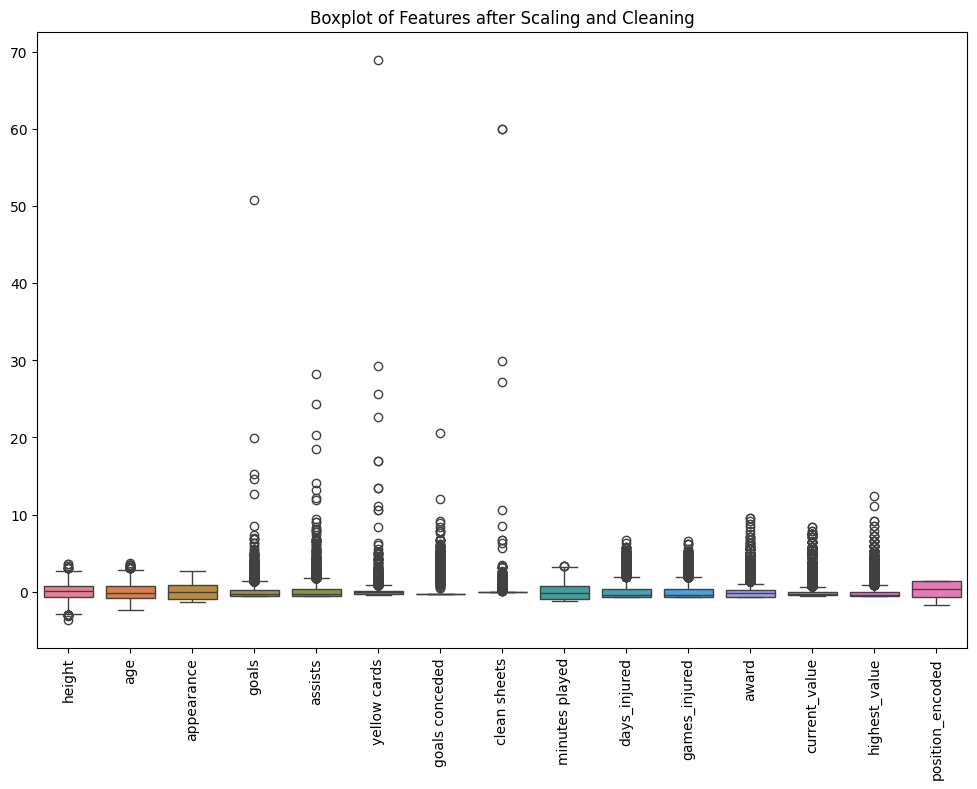

In [9]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X.columns))
plt.title("Boxplot of Features after Scaling and Cleaning")
plt.xticks(rotation=90)
plt.show()
